# Simulation Analysis and Its Application in Python

As the complexity of the problem grows, so does the need to compute it. However, it is not always possible to have a real-world data or real-world condition in which all conditions are met. For instance, suppose we think there is a correlation and randomness in the data and we would like to figure out what happens if we have correlation and randomness, this is the point where `Simulation` comes into the stage. 


Simulation characterizes this enviroment and enable us to understand what would happen if we have correlation and randomness in the data? Differently, by simulation, we are able to comprehend different course of actions. Furthermore, it provides valuable insights about likely changes and enable us to validate the model accordingly. So, simulation imitates the real-world situations in a more stylized environment. 

In this lesson, we will learn the following:
* Monte Carlo Simulation
* Stock Price Simulation via Monte Carlo Simulation

## Monte Carlo Simulation

The Monte Carlo methods are basically a class of computational algorithms that rely on repeated random sampling to obtain certain numerical results, and can be used to solve problems that have a probabilistic interpretation.

Analytical solution does not always exist and this is a real problem in finance and in other fields as well. `Monte Carlo` simulation is an attempt to attack this problem. It is a numerical method that makes use of random number to find an approximate solution. The history of Monte Carlo dates back to 1940 when Manhattan Project was in the process (Malvin et al., 2008):

"Fermi in the 1930s had done work regarding Monte Carlo as way of approximation but it was a highly rigorous and time consuming and failed to gain traction. In the 1940s when he met with John Von Neumann the combination of Fermi’s approximation method and Von Neumann’s computer knowledge where able to use it calculate approximations with high degree of accuracy. In modern finance it is used as financial concepts have got more complicated to be able to approximate accurate financial scenarios." 

In principle, Monte Carlo simulation takes advantage of `Law of Large Number` and `Central Limit Theorem`. Let's discuss these two concepts first and highlight the importance for Monte Carlo Simulation.

### Law of Large Numbers

The Law of Large Numbers has an important place in both Statistics / Probability and Machine Learning. This theorem reveals that the sample obtained by taking more samples represents the population better.

According to the law of large numbers, as the sample size grows, the average of the sample approaches the average of the population. This approach tells us the importance of sample size. Simply, the larger the sample size, the better the representative sample population.



The Law of Large Numbers is very simple: as the number of samples with a uniform distribution and randomly selected variables increases, the sample mean approaches the theoretical average.



So, the `Law of Large Number` stresses the importance of large sample size. Accordingly, as we increase the number of sample size, the sample mean becomes very close to the population mean.The Law of Large Numbers therefore explains why casinos make money in the long run.

The law of large numbers guarantees convergence for the Monte Carlo Method.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy.stats import binom
from numpy.random import randint
import yfinance as yf
import seaborn as sns; sns.set()

In [9]:
sample = []
sample_means = []
for i in range(1, 2000):
    shot = np.random.randint(low=1, high=7, size=1)[0]
    sample.append(shot)
    sample_means.append((np.mean(sample)))

In [13]:
def sample_plot(sample_means, sample_size, subplot_no):
    plt.subplot(subplot_no)
    plt.hlines(3.5, 0, sample_size, color='r')
    plt.plot(sample_means[0:sample_size])
    plt.ylim((1,6))
    plt.title('Sample Size = {}'.format(sample_size))
    plt.xlabel('Sample Size')
    plt.ylabel('Sample mean')
    return plt

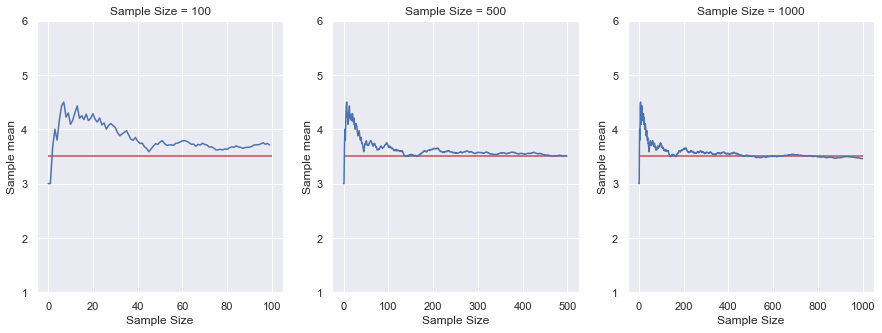

In [15]:
plt.figure(figsize=(15,5))
sample_plot(sample_means, 100, 131)
sample_plot(sample_means, 500, 132)
sample_plot(sample_means, 1000, 133)
plt.show()

### Central Limit Theorem

The `central limit theorem` states that, irrespective of the distribution we have at first, if we take sufficiently large random samples (n>30) from the population with replacement, then the distribution of the sample means will be approximately normally distributed. 

In the context of simulation, the `central limit theorem` tells us that the distribution of the errors will converge to a normal distribution so that we can figure out the number of times we need to resample to achieve a certain accuracy. 



By assuming normal distribution of the errors, we have information to calculate the confidence interval and see what sample size is needed for the desired accuracy.

Mathematically, the CLT states that:

$$\alpha_i\xrightarrow[]{D}\alpha +\frac{\sigma}{\sqrt{n}}\mathbb{N}(0,1)$$

where D denotes convergence in distribution.

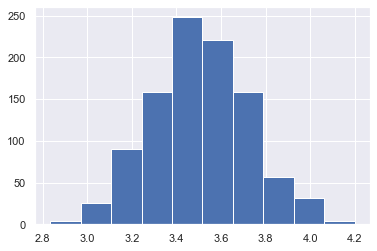

In [16]:
means = [np.mean(randint(1, 7, 60)) for _ in range(1000)]
plt.hist(means)
plt.show()

Let $X_1, X_2,\cdots..X_n$ are independent and identically distributed random variables and f(x) is a real-valued function. Then, Law of Large Number states that:

$$\mathbb{E}(f(X))\approx\frac{1}{N}\sum_i^N f(X_i)$$

In a nutshell, Monte Carlo simulation is nothing but generating random samples and calculating its mean. Computationally, it follows the following steps:

* Define the domain
* Generate random numbers
* Iteration and aggregation the result

Determination of $\pi$ is a toy but illustrative example for Monte Carlo application. Let's start with it.

Suppose we have a circle with radius r = 1 and area=4. Area of a circle is $\pi$ and area of a square in which we try to fit circle is 4. The ratio turns out to be:

$$\frac{\pi}{4} (eq.1) $$

To leave $\pi$ alone, the proportion between circle and area can be defined as:

$$\frac{Circumference_{circle}}{Area_{square}}=\frac{m}{n} (eq.2) $$

Once we equalize `eq.1` and `eq.2`, $\pi=4x\frac{m}{n}$

If we go step by step, the first one is to define domain which is [-1,1]. So, the numbers inside the circle satisfy: $x^2+y^2\leq 1$

Second step is to generate random numbers to meet the above-given condition. That is to say, we need to have uniformly distributed random samples, which is a rather easy task in Python. For the sake of practice, I will generate 100 uniformly distributed random numbers by using numpy library:

In [20]:
np.random.uniform(-1, 1, 100)

array([ 0.40329932,  0.70407958,  0.82695534,  0.46282981,  0.95272886,
        0.65401274, -0.9820251 , -0.08566576,  0.88287243, -0.91748141,
       -0.59370147,  0.8126956 , -0.96847066,  0.03509257, -0.72871291,
       -0.19978842, -0.36189745, -0.55725145,  0.27444867,  0.23071798,
        0.72942575, -0.53828177,  0.40560628,  0.19512354,  0.41401683,
        0.89836403,  0.27237817,  0.06908265, -0.36316074,  0.82564038,
       -0.46202798,  0.77523859, -0.42729848,  0.21675538,  0.39923499,
        0.53588776,  0.41483231, -0.34265761,  0.55650462,  0.33301858,
       -0.29596491, -0.09953906, -0.1843357 ,  0.95452372, -0.0949425 ,
       -0.62350307, -0.75308658, -0.88485947, -0.81350289,  0.28647639,
       -0.55264773,  0.60786931,  0.63043553, -0.16341806, -0.2876623 ,
        0.87605578, -0.76447482,  0.03844879,  0.12728727, -0.62433962,
       -0.46598784,  0.329923  , -0.59685033,  0.98520435,  0.40915303,
        0.16427553, -0.24546261,  0.78641382, -0.75123347, -0.03

As we are working on 2-dimensional world, single random sample is not enough. Let's do it both for x and y:

In [41]:
x = np.random.uniform(-1, 1, 3000)
y = np.random.uniform(-1, 1, 3000)

Now, it is time to iteration and aggregation process. As we have 100 sample data points, I define the sample parameter below as 100:

In [42]:
sample = 3000
def pi_cal(x, y):
    point_inside_circle = 0
    for i in range(sample):
        if np.sqrt(x[i]**2 + y[i]**2)<=1:
            point_inside_circle +=1
    print('pi value is {}'.format(4*point_inside_circle/sample)) 

In [43]:
pi_cal(x, y)

pi value is 3.1413333333333333


We know that $\pi$ is 3.14 but what the one we found overshoots the real one. Maybe, it is because of the failure to satisfy the `large enough sample size` requirement of the Law of Large Numbers theorem. Let's try with larger sample: